## Comparison of various Initialization methods


-> Zeros initialization

-> Random initialization -- This initializes the weights to large random values.

-> He initialization -- This initializes the weights to random values scaled according to a paper by He et al., 2015.


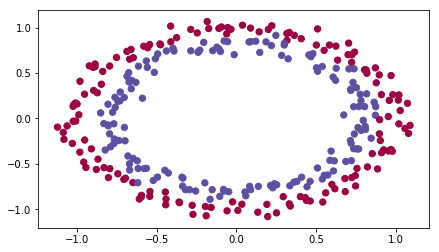

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
from init_utils import sigmoid, relu, compute_loss, forward_propagation, backward_propagation
from init_utils import update_parameters, predict, load_dataset, plot_decision_boundary, predict_dec

%matplotlib inline
plt.rcParams['figure.figsize'] = (7.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# load image dataset: blue/red dots in circles
X_train, y_train, X_test, y_test = load_dataset()


In [2]:
def model(X, Y, learning_rate=0.01, num_iterations=15000, print_cost=True, initialization="he"):
    """
    Implements a three-layer neural network: LINEAR->RELU->LINEAR->RELU->LINEAR->SIGMOID.
    
    Arguments:
    X -- input data, of shape (2, number of examples)
    Y -- true "label" vector (containing 0 for red dots; 1 for blue dots), of shape (1, number of examples)
    learning_rate -- learning rate for gradient descent 
    num_iterations -- number of iterations to run gradient descent
    print_cost -- if True, print the cost every 1000 iterations
    initialization -- flag to choose which initialization to use ("zeros","random" or "he")
    
    Returns:
    parameters -- parameters learnt by the model
    """
        
    grads = {}
    costs = [] # to keep track of the loss
    m = X.shape[1] # number of examples
    layers_dims = [X.shape[0], 10, 5, 1]
    
    # Initialize parameters dictionary.
    if initialization == "zeros":
        parameters = initialize_parameters_zeros(layers_dims)
    elif initialization == "random":
        parameters = initialize_parameters_random(layers_dims)
    elif initialization == "he":
        parameters = initialize_parameters_he(layers_dims)

    # Loop (gradient descent)

    for i in range(0, num_iterations):

        # Forward propagation: LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID.
        a3, cache = forward_propagation(X, parameters)
        
        # Loss
        cost = compute_loss(a3, Y)

        # Backward propagation.
        grads = backward_propagation(X, Y, cache)
        
        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)
        
        # Print the loss every 1000 iterations
        if print_cost and i % 1000 == 0:
            print("Cost after iteration {}: {}".format(i, cost))
            costs.append(cost)
            
    # plot the loss
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

### Zero initialization

In [3]:
def initialize_parameters_zeros(layer_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the size of each layer.
    
    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    W1 -- weight matrix of shape (layers_dims[1], layers_dims[0])
                    b1 -- bias vector of shape (layers_dims[1], 1)
                    ...
                    WL -- weight matrix of shape (layers_dims[L], layers_dims[L-1])
                    bL -- bias vector of shape (layers_dims[L], 1)
    """
    
    parameters = {}
    n_layers = len(layer_dims)
    
    for curr_layer in range(1, n_layers):
        
        parameters['W' + str(curr_layer)] = np.zeros(shape=(layer_dims[curr_layer], layer_dims[curr_layer-1]))
        parameters['b' + str(curr_layer)] = np.zeros(shape=(layer_dims[curr_layer], 1))
        
    return parameters

In [4]:
parameters = initialize_parameters_zeros([3,2,1])
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[0. 0. 0.]
 [0. 0. 0.]]
b1 = [[0.]
 [0.]]
W2 = [[0. 0.]]
b2 = [[0.]]


Cost after iteration 0: 0.6931471805599453
Cost after iteration 1000: 0.6931471805599453
Cost after iteration 2000: 0.6931471805599453
Cost after iteration 3000: 0.6931471805599453
Cost after iteration 4000: 0.6931471805599453
Cost after iteration 5000: 0.6931471805599453
Cost after iteration 6000: 0.6931471805599453
Cost after iteration 7000: 0.6931471805599453
Cost after iteration 8000: 0.6931471805599453
Cost after iteration 9000: 0.6931471805599453
Cost after iteration 10000: 0.6931471805599455
Cost after iteration 11000: 0.6931471805599453
Cost after iteration 12000: 0.6931471805599453
Cost after iteration 13000: 0.6931471805599453
Cost after iteration 14000: 0.6931471805599453


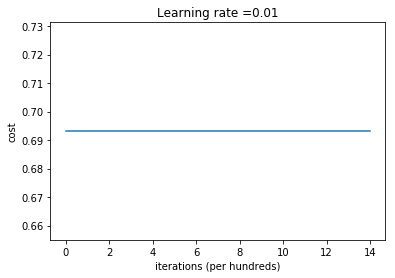

Train:
Accuracy: 0.5
Test:
Accuracy: 0.5


In [5]:
parameters = model(X_train, y_train, initialization='zeros')
print("Train:")
train_pred = predict(X_train, y_train, parameters)
print("Test:")
test_pred = predict(X_test, y_test, parameters)

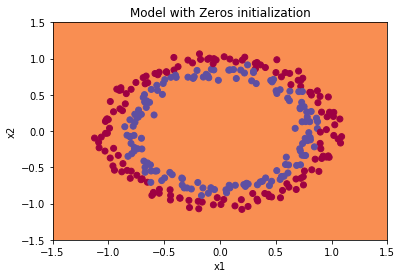

In [7]:
plt.title("Model with Zeros initialization")
axes = plt.gca()
axes.set_xlim([-1.5, 1.5])
axes.set_ylim([-1.5, 1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), X_train, y_train)

#Error log: unhashable type 'numpy.ndarray' use c=y[0]

The model is predicting 0 for every example.

In general, initializing all the weights to zero results in the network failing to break symmetry. This means that every neuron in each layer will learn the same thing, and you might as well be training a neural network with $n^{[l]}=1$ for every layer, and the network is no more powerful than a linear classifier such as logistic regression.

    -> The weights $W^{[l]}$ should be initialized randomly to break symmetry.
    
    -> It is however okay to initialize the biases $b^{[l]}$ to zeros. Symmetry is still broken so long as $W^{[l]}$ is initialized randomly.


## Random Initialization

In [12]:
def initialize_parameters_random(layer_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the size of each layer.
    
    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    W1 -- weight matrix of shape (layers_dims[1], layers_dims[0])
                    b1 -- bias vector of shape (layers_dims[1], 1)
                    ...
                    WL -- weight matrix of shape (layers_dims[L], layers_dims[L-1])
                    bL -- bias vector of shape (layers_dims[L], 1)
    """
    
    parameters = {}
    n_layers = len(layer_dims)
    
    for curr_layer in range(1, n_layers):
        
        parameters['W' + str(curr_layer)] = np.random.randn(layer_dims[curr_layer], layer_dims[curr_layer-1]) * 10
        parameters['b' + str(curr_layer)] = np.zeros(shape=(layer_dims[curr_layer], 1))
        
    return parameters

In [13]:
parameters = initialize_parameters_random([3, 2, 1])
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[  3.80321617 -11.8216109    6.00744915]
 [ -2.30044583  12.56429661 -13.29467822]]
b1 = [[0.]
 [0.]]
W2 = [[ 1.48507879 -1.11506699]]
b2 = [[0.]]


F:\Conda_Scripts\deeplearning.ai\02_Improving_Deep_Neural_Networks\01\init_utils.py:145: RuntimeWarning: divide by zero encountered in log
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)
F:\Conda_Scripts\deeplearning.ai\02_Improving_Deep_Neural_Networks\01\init_utils.py:145: RuntimeWarning: invalid value encountered in multiply
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)


Cost after iteration 0: inf
Cost after iteration 1000: inf
Cost after iteration 2000: 0.527958848288324
Cost after iteration 3000: 0.38978388951736453
Cost after iteration 4000: 0.3142104503962987
Cost after iteration 5000: 0.2810163190825959
Cost after iteration 6000: 0.25098765660253924
Cost after iteration 7000: 0.2378536179274906
Cost after iteration 8000: 0.32547167679566913
Cost after iteration 9000: 0.21752838097176927
Cost after iteration 10000: 0.21452947721454654
Cost after iteration 11000: 0.21282810529348672
Cost after iteration 12000: 0.21029153534901207
Cost after iteration 13000: 0.20847572106744525
Cost after iteration 14000: 0.2076806430277287


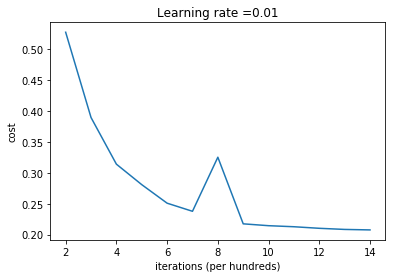

Train:
Accuracy: 0.8866666666666667
Test:
Accuracy: 0.81


In [15]:
parameters = model(X_train, y_train, initialization='random')
print("Train:")
train_pred = predict(X_train, y_train, parameters)
print("Test:")
test_pred = predict(X_test, y_test, parameters)

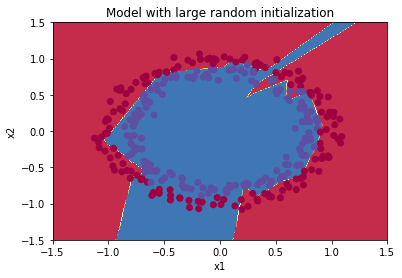

In [16]:
plt.title("Model with large random initialization")
axes = plt.gca()
axes.set_xlim([-1.5, 1.5])
axes.set_ylim([-1.5, 1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), X_train, y_train)

Observations:

   -> The cost starts very high. This is because with large random-valued weights, the last activation (sigmoid) outputs results that are very close to 0 or 1 for some examples, and when it gets that example wrong it incurs a very high loss for that example. Indeed, when $\log(a^{[3]}) = \log(0)$, the loss goes to infinity.
    
   -> Poor initialization can lead to vanishing/exploding gradients, which also slows down the optimization algorithm.
    If you train this network longer you will see better results, but initializing with overly large random numbers slows down the optimization.

   -> Initializing weights to very large random values does not work well.
    
   -> Hopefully intializing with small random values does better. The important question is: how small should be these random values be? Lets find out in the next part!


## He initialization 

Weights initialized randomly by multipying it with the term sqrt(2./layers_dims[l-1]

In [21]:
def initialize_parameters_he(layer_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the size of each layer.
    
    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    W1 -- weight matrix of shape (layers_dims[1], layers_dims[0])
                    b1 -- bias vector of shape (layers_dims[1], 1)
                    ...
                    WL -- weight matrix of shape (layers_dims[L], layers_dims[L-1])
                    bL -- bias vector of shape (layers_dims[L], 1)
    """
    
    parameters = {}
    num_layers = len(layer_dims)
    
    for curr_layer in range(1, num_layers):
        
        parameters["W" + str(curr_layer)] = np.random.randn(layer_dims[curr_layer], layer_dims[curr_layer - 1]) * np.sqrt(2.0 / layer_dims[curr_layer - 1])
            
        parameters["b" + str(curr_layer)] = np.zeros(shape=(layer_dims[curr_layer], 1))
        
    return parameters

In [22]:
parameters = initialize_parameters_he([2, 4, 1])
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 0.65238771 -0.6942551 ]
 [ 1.75363109  2.26379977]
 [-1.13828883 -1.24234297]
 [-0.34375749  1.39103936]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-1.34972293  1.34150199 -0.16930366  0.31865788]]
b2 = [[0.]]


Cost after iteration 0: 0.6992546315034437
Cost after iteration 1000: 0.6835096359242339
Cost after iteration 2000: 0.6753628609416218
Cost after iteration 3000: 0.6656303592882823
Cost after iteration 4000: 0.6499511516752491
Cost after iteration 5000: 0.6247048699233919
Cost after iteration 6000: 0.5723810015402693
Cost after iteration 7000: 0.47371557277430143
Cost after iteration 8000: 0.36043217281644374
Cost after iteration 9000: 0.2673679509979158
Cost after iteration 10000: 0.1949392625015273
Cost after iteration 11000: 0.1495208436983485
Cost after iteration 12000: 0.11813274366181872
Cost after iteration 13000: 0.09410965719241926
Cost after iteration 14000: 0.07903569175623988


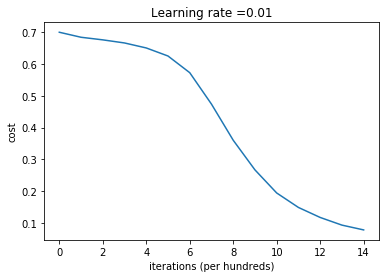

Train:
Accuracy: 0.9933333333333333
Test:
Accuracy: 0.95


In [23]:
parameters = model(X_train, y_train, initialization='he')
print("Train:")
train_pred = predict(X_train, y_train, parameters)
print("Test:")
test_pred = predict(X_test, y_test, parameters)

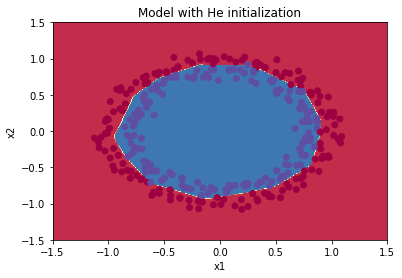

In [24]:
plt.title("Model with He initialization")
axes = plt.gca()
axes.set_xlim([-1.5, 1.5])
axes.set_ylim([-1.5, 1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), X_train, y_train)

Observations:

    The model with He initialization separates the blue and the red dots very well in a small number of iterations.

## Conclusion

 1) Zero Initialization - 50% accuracy - prone to Symmetry problem, hence model never learns
 
 2) Random Initialization with large - 80% accuracy - When weights are large, model takes time to converge
 
 3) He Initialization - 99% accuracy - Recommended method of initialization